# Question 1

**On suppose pour simplifier les notations que $C_{i,-1} = 0$ pour tout $i$**

Il y a 2 méthodes possibles pour résoudre cette question, sachant qu'on ne conditionne pas par X, mais seulement pas la note initiale de l'individu. 

* La plus simple : utiliser la matrice M de l'énoncé qui correspond à la probabilité de passer de l'état $n_i^0$ à $t = 0$, à l'état $n_i$ à $t = 1$ an. On obtient alors directement $\mathbb{P}(n_i = k | n_i^0) = M_{n_i^0,k}$ 
* En appliquant la définition avec la matrice $C$. 

Par définition : 
$\mathbb{P}(n_i = k | n_i^0) = P(C_{n_i^0,k - 1} \leq 1 - \Phi(Z_i) \leq C_{n_i^0,k} | n_i^0)$

La variable $Z_i$ suit une loi $N(0,1)$ de fonction de répartition $\Phi$. Par conséquent $U = \Phi(Z_i)$ suit une loi uniforme sur $[0,1]$ et il en est de même pour $V = 1-U$. 
  
  Ainsi on a : $P(C_{n_i^0,k - 1} \leq 1 - \Phi(Z_i) \leq C_{n_i^0,k} | n_i^0) = P(C_{n_i^0,k - 1} \leq V \leq C_{n_i^0,k} | n_i^0) = C_{n_i^0,k} - C_{n_i^0,k - 1} = M_{n_i^0,k}$ par définition de M  

# Question 2

**On suppose pour simplifier les notations que $C_{i,-1} = 0$ pour tout $i$**

Dans cette question, comme on conditionne par X, on ne peut plus utiliser la matrice M directement. Il faut donc appliquer la définition.


$\mathbb{P}(n_i = k | n_i^0, X) = P(C_{n_i^0,k - 1} \leq 1 - \Phi(Z_i) \leq C_{n_i^0,k} | n_i^0, X) =  P(C_{n_i^0,k - 1} \leq \Phi(-Z_i) \leq C_{n_i^0,k} | n_i^0, X)$  (la 2e égalité venant de la symétrie de la fonction de répartition de la loi normale)

Quand on conditionne par rapport à $X$, $X$ est considéré comme "constant". 

On peut donc réecrire l'égalité différemment. Comme $\Phi$ est strictement croissante, sa fonction de répartition inverse $\Phi^{-1}$ l'est aussi et :

$\mathbb{P}(n_i = k | n_i^0, X) =  P(\Phi^{-1}(C_{n_i^0,k - 1}) \leq -Z_i \leq \Phi^{-1}(C_{n_i^0,k}) | n_i^0, X)$

En utilisant l'expression de $Z_i$ en fonction de $X, \epsilon_i$ on a : 

$\mathbb{P}(n_i = k | n_i^0, X) $


= $P(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k - 1}) + \sqrt{\rho}X) \leq -\epsilon_i \leq \frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k}) + \sqrt{\rho}X) | n_i^0, X) $ 

= $P(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k - 1}) + \sqrt{\rho}X) \leq \epsilon_i \leq \frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k}) + \sqrt{\rho}X) | n_i^0, X) $ $ \text{ ( } \epsilon_i \text { et } -\epsilon_i $ ont la même loi) 

= $P(\Phi(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k - 1}) + \sqrt{\rho}X)) \leq \Phi(\epsilon_i) \leq \Phi(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k}) + \sqrt{\rho}X)) | n_i^0, X) $ $ \text{  ( } \Phi$ est croissante) 

= $\Phi(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k}) + \sqrt{\rho}X)) - \Phi(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k - 1}) + \sqrt{\rho}X)) $ $ \text{     ( } \Phi(\epsilon_i)$ suit une loi uniforme) 


Pour $k = 1$ l'expression se simplifie en remarquant que $C_{n_i^0,-1} = 0$ en $\Phi(\frac{1}{\sqrt{1-\rho}}(\Phi^{-1}(C_{n_i^0,k}) + \sqrt{\rho}X))$

# Question 3 

In [5]:
import numpy as np
from scipy.stats import norm
from numpy import sqrt, array, exp

def pdf(x) : 
    return norm.pdf(x) ##p(x)

def cdf(x) : 
    return norm.cdf(x) ##Phi 

def ppf(x) : 
    return norm.ppf(x) ##Phi^-1

def randn(mu = 0, sigma = 1, size = 1) : 
    return mu + sqrt(sigma)*np.random.randn(size) ## N(0,1)


M = array([[0.8,0.1,0.1],[0.2,0.75,0.05],[0,0,1]])
C = np.cumsum(M,axis = 1)


X = 1
rho = 0.5
N = 1000



##Simuler une note donnée pour une entreprise


def simulate_note(n0,X,rho): 
    Z = sqrt(rho)*X + sqrt(1-rho)*randn() ## Simulation de Z 
    phi_Z = 1 - cdf(Z) ##Simulation de 1 - phi(Z)
    return np.where(phi_Z<=C[n0])[0][0]  ## On récupère le premier indice de la ligne n0 qui vérifie phi_Z <= C[n0]




##Simuler les notes à 1 an sachant un ensemble de notes à t = 0

def simulation_notes(notes,X,rho) : 
    Zs = sqrt(rho)*X + sqrt(1-rho)*randn(size = len(notes))
    phi_Zs = 1 - cdf(Zs)
    phi_Zs = phi_Zs.reshape((len(notes),1))
    return np.argmax(phi_Zs<=C[notes], axis = 1)






##Juste pour vérifier les calculs de la question 2

def verification_question2(n0,n1,X,rho ):
    Ci = C[n0]

    ### Calcul théorique de la probabilité via les formules de la qustion 2 
    theorique_k = cdf(1/sqrt(1-rho)*(ppf(Ci[n1]) + sqrt(rho)*X))
    theorique_k1 = 0 if n1 == 0 else cdf(1/sqrt(1-rho)*(ppf(Ci[n1-1]) + sqrt(rho)*X))
    theorique = theorique_k - theorique_k1

    ### Calcul théorique de la probabilité de la question 2 via des simulations  
    N = 10000
    empirique = np.mean([simulate_note(n0,X,rho)==n1 for _ in range(N)])  

    return {'valeur théorique' : theorique, 'valeur empirique' : empirique}

print(verification_question2(1,1,X=0.1,rho = 0.5))


print('-------------------------------------------------------------------------------------------')


notes = np.random.randint(0,3,size = 35)


print(list(notes))

print('-------------------------------------------------------------------------------------------')

print(list(simulation_notes(notes,X = 0.8, rho = 0.5)))


{'valeur théorique': 0.854565085795775, 'valeur empirique': 0.8574}
-------------------------------------------------------------------------------------------
[2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0]
-------------------------------------------------------------------------------------------
[2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0]


# Question 4

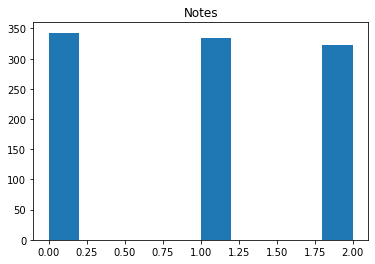

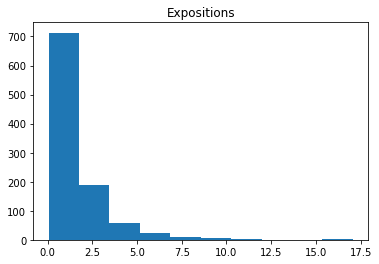

In [6]:
import matplotlib.pyplot as plt


def lognormale(mu = 0, sigma = 1, size = N) : 
    return exp(randn(mu,sigma,size))

mu = 0
sigma = 1
N = 1000


### On fixe les notes et les expositions à t = 0 pour lancer les simulations

notes = np.random.randint(0,3,N)
E = lognormale(mu,sigma,N)


plt.hist(notes)
plt.title('Notes')
plt.show()

plt.hist(E)
plt.title('Expositions')
plt.show()

In [7]:
## Calcul de une perte


n=1000

def perte_L(notes = notes, E = E, rho=rho, random_notes_Expo = False) : 

  ### Si l'on souhaite en réalité simuler des notes et des expositions pour chaque simulation

  if random_notes_Expo == True : 
    notes = np.random.randint(0,3,N)
    E = lognormale(mu,sigma,N)

  X = randn()
  notes_1an = simulation_notes(notes,X,rho)
  default = array(notes_1an)==2 ### On prend en compte uniquement les entreprises en défaut
  perte = np.dot(default,E)### On fait la somme des pertes correspondant aux entreprises en défaut
  return perte


import time 
nb_simulations = 10000
percentile = 0.65

### On fait 2 types de simulations 
## 1 simulation où les notes et l'exposition sont fixés(cellule du dessus et histogrammes)
## 1 simulation où les notes et l'exposition sont aléatoires pour chaque simulation.



print('Notes et Expositions fixés : \n ')
print('Sans parallélisation :')


## Sans parallélisation 

t1 = time.process_time()
pertes = []

for i in range(nb_simulations) : 
  perte = perte_L(notes,E,rho)
  pertes.append(perte)
t2 = time.process_time()

print(f' {t2 - t1} secondes')
print(f"Quantile d'ordre {percentile}  : {np.percentile(pertes,percentile*100)}")

## Avec parallélisation

from multiprocessing import Pool

## Fonctions qui renvoie n pertes (utile pour faire de la parallélisation)

def n_pertes(params) :
  n, notes, E, rho = params 
  return [perte_L(notes,E,rho) for _ in range(n)]

print('\nParallélisation :')

t1 = time.process_time()


PARAMS = [[n,notes,E,rho] for _ in range(8)]

# On lance sur 8 coeurs

pool = Pool(8)
pertes2 = pool.map(n_pertes,PARAMS)

t2 = time.process_time()
print(f' {t2 - t1} secondes')
print(f"Quantile d'ordre {percentile}  : {np.percentile(pertes2,percentile*100)}")



###############

print('-------------------------------------------------------------------------------------------')



print('\nNotes et Expositions aléatoires : \n')
print('Sans parallélisation :')

## Sans parallélisation 

t1 = time.process_time()
pertes = []

for i in range(nb_simulations) : 
  perte = perte_L(notes,E,rho, random_notes_Expo = True)
  pertes.append(perte)
t2 = time.process_time()

print(f'{t2 - t1} secondes')
print(f"Quantile d'ordre {percentile}  : {np.percentile(pertes,percentile*100)}")

## Avec parallélisation

from multiprocessing import Pool

## Fonctions qui renvoie n pertes (utile pour faire de la parallélisation)

def n_pertes(params) :
  n, notes, E, rho, random_notes_Expo = params 
  return [perte_L(notes,E,rho, random_notes_Expo) for _ in range(n)]

print('\nParallélisation :')

t1 = time.process_time()


PARAMS = [[n,notes,E,rho,True] for _ in range(8)]

# On lance sur 8 coeurs

pool = Pool(8)

pertes2 = pool.map(n_pertes,PARAMS)

t2 = time.process_time()
print(f'{t2 - t1} secondes')
print(f"Quantile d'ordre {percentile} : {np.percentile(pertes2,percentile*100)}")

Notes et Expositions fixés : 
 
Sans parallélisation :
 2.8037727760000006 secondes
Quantile d'ordre 0.65  : 557.4312940094595

Parallélisation :
 0.043262405000000115 secondes
Quantile d'ordre 0.65  : 558.7153989825032
-------------------------------------------------------------------------------------------

Notes et Expositions aléatoires : 

Sans parallélisation :
3.297833456000001 secondes
Quantile d'ordre 0.65  : 624.9387809351607

Parallélisation :
0.04314996400000126 secondes
Quantile d'ordre 0.65 : 624.8196621107461


# Question 5

Supposons avoir observé N entreprises avec chacun leur notation à t=0 $n_i^0$ et $n_i$ à t = 1. On peut alors calculer la probabilité empirique de passage d'une notation $i$ à une notation $j$ que l'on notera $\hat{P}_{i,j}$. 

*(Nombre d'entreprises ayant la notation i en t = 0 et j en t = 1)/(Nombre d'entreprises ayant la notation i en t = 0)*

Le modèle nous fournit aussi une valeur théorique qui est $P(n=j|n^0 = i, X)$, fonction de $X$ et de $\rho$, calculée dans la question 2. 

Ainsi, on peut chercher à trouver les meilleurs paramètres $\rho, X$ de sorte que les probabilités empiriques collent le mieux aux probabilités théoriques. En minimisant une somme de moindres carrés, on peut chercher donc $\rho, X$ sous la forme : 


$\rho, X = argmin_{\rho', X'} \sum_{i,j \in [0,2]} (\hat{P}_{i,j} - P(n=j|n^0 = i, X'))^2 $ 


